- author: Johannes L. Fjeldså
- email: johannes.larsen.fjeldså@nmbu.no

# Merge features into multivariate datasets
## Import libraries

In [2]:
import numpy as np
import xarray as xr 
import re
from src.preproces import *

## Create mv files

In [2]:
pattern = r'r\d+'

def extract_realisation_number(file_name):
    match = re.search(pattern, file_name)
    return int(match.group(0)[1:])

just exchange the mask name:
- seamasked
- landmasked
- nomask

In [5]:
file_handler = Handle_Files()

variables = ['pr', 'tas', 'rx5dayETCCDI', 'txxETCCDI']
scenarios = ['ssp126', 'ssp245', 'ssp370', 'ssp585']

main_data_folder = '/nird/home/johannef/Masterthesis_S23 DataFiles/AnnualGlobalClimatologies/seamasked'
main_save_folder = '/nird/home/johannef/Masterthesis_S23 DataFiles/AnnualGlobalClimatologies/seamasked/multivariate'

for scenario in scenarios:
    
    data_folder_tas = '/'.join([main_data_folder, 'tas', scenario])
    file_names_tas = sorted(file_handler.get_all_filenames_in_dir(data_folder_tas), 
                            key=extract_realisation_number)

    data_folder_pr = '/'.join([main_data_folder, 'pr', scenario])
    file_names_pr = sorted(file_handler.get_all_filenames_in_dir(data_folder_pr), 
                           key=extract_realisation_number)

    data_folder_rx5dayETCCDI = '/'.join([main_data_folder, 'rx5dayETCCDI', scenario])
    file_names_rx5dayETCCDI = sorted(file_handler.get_all_filenames_in_dir(data_folder_rx5dayETCCDI), 
                                     key=extract_realisation_number)

    data_folder_txxETCCDI = '/'.join([main_data_folder, 'txxETCCDI', scenario])
    file_names_txxETCCDI = sorted(file_handler.get_all_filenames_in_dir(data_folder_txxETCCDI), 
                                  key=extract_realisation_number)

    save_folder = '/'.join([main_save_folder, scenario])

    for indx in range(len(file_names_tas)):

        file_name_tas = file_names_tas[indx]
        file_name_pr = file_names_pr[indx]
        file_name_rx5dayETCCDI = file_names_rx5dayETCCDI[indx]
        file_name_txxETCCDI = file_names_txxETCCDI[indx]
        
        match_tas = re.match(pattern, file_name_tas)
        match_pr = re.match(pattern, file_name_pr)
        match_rx5dayETCCDI = re.match(pattern, file_name_rx5dayETCCDI)
        match_txxETCCDI = re.match(pattern, file_name_txxETCCDI)

        if match_tas == match_pr == match_rx5dayETCCDI == match_txxETCCDI:
            
            multivariate_ds = xr.merge([
                file_handler.read_netcdf_to_xr(directory=data_folder_tas, file_name=file_name_tas),
                file_handler.read_netcdf_to_xr(directory=data_folder_pr, file_name=file_name_pr),
                file_handler.read_netcdf_to_xr(directory=data_folder_rx5dayETCCDI, file_name=file_name_rx5dayETCCDI),
                file_handler.read_netcdf_to_xr(directory=data_folder_txxETCCDI, file_name=file_name_txxETCCDI)
            ])
            print(f'multivariate_ds: \n {multivariate_ds}')

            multivariate_filename = file_name_tas.replace('tas', 'mv')
            file_handler.save_dataset_to_netcdf(multivariate_ds, multivariate_filename, save_folder)
        else:
            print("The match is different for at least one file.")

multivariate_ds: 
 <xarray.Dataset>
Dimensions:       (year: 86)
Coordinates:
  * year          (year) int64 2015 2016 2017 2018 2019 ... 2097 2098 2099 2100
    height        float64 9.969e+36
Data variables:
    tas           (year) float64 ...
    pr            (year) float64 ...
    rx5dayETCCDI  (year) float64 ...
    txxETCCDI     (year) float64 ...
multivariate_ds: 
 <xarray.Dataset>
Dimensions:       (year: 86)
Coordinates:
  * year          (year) int64 2015 2016 2017 2018 2019 ... 2097 2098 2099 2100
    height        float64 9.969e+36
Data variables:
    tas           (year) float64 ...
    pr            (year) float64 ...
    rx5dayETCCDI  (year) float64 ...
    txxETCCDI     (year) float64 ...
multivariate_ds: 
 <xarray.Dataset>
Dimensions:       (year: 86)
Coordinates:
  * year          (year) int64 2015 2016 2017 2018 2019 ... 2097 2098 2099 2100
    height        float64 9.969e+36
Data variables:
    tas           (year) float64 ...
    pr            (year) float64 ...


## Open example file:

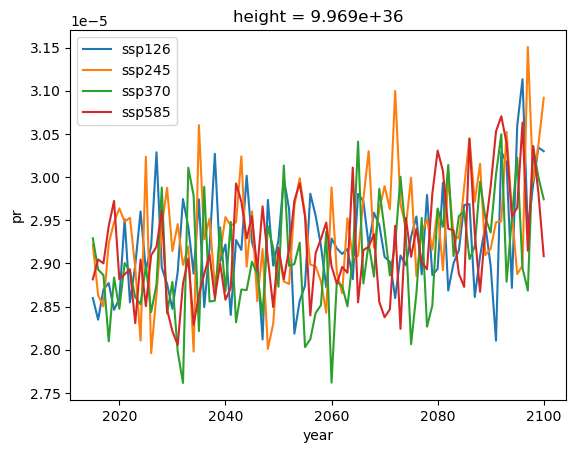

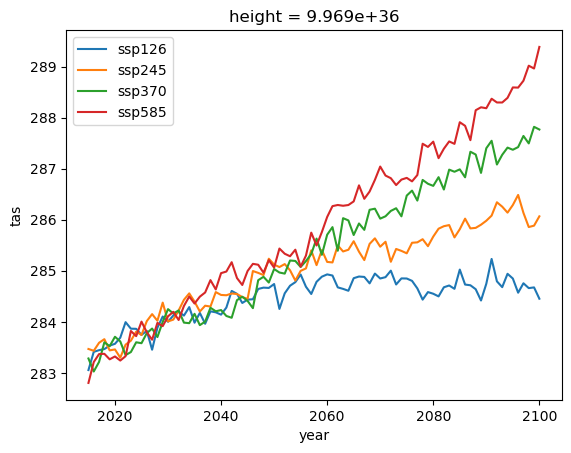

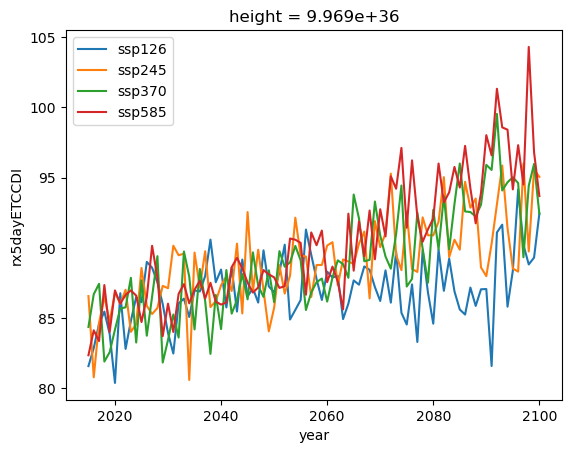

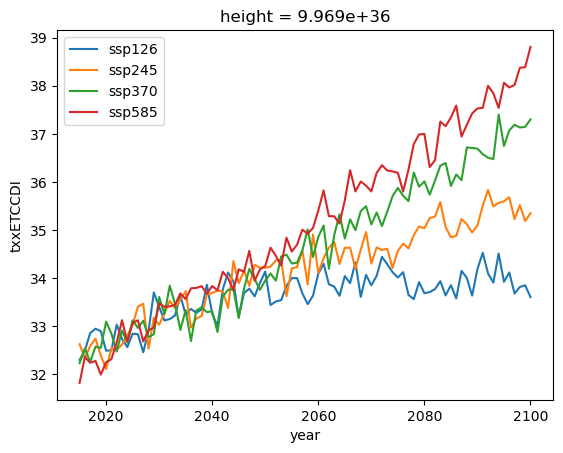

In [12]:
test_file_ssp126 = Handle_Files().read_netcdf_to_xr('/nird/home/johannef/Masterthesis_S23 DataFiles/AnnualGlobalClimatologies/landmasked/multivariate/ssp126/mv_yr_ACCESS-ESM1-5_ssp126_r7i1p1f1_gn_2015-2100_landmasked_glob.nc')
test_file_ssp245 = Handle_Files().read_netcdf_to_xr('/nird/home/johannef/Masterthesis_S23 DataFiles/AnnualGlobalClimatologies/landmasked/multivariate/ssp245/mv_yr_ACCESS-ESM1-5_ssp245_r1i1p1f1_gn_2015-2100_landmasked_glob.nc')
test_file_ssp370 = Handle_Files().read_netcdf_to_xr('/nird/home/johannef/Masterthesis_S23 DataFiles/AnnualGlobalClimatologies/landmasked/multivariate/ssp370/mv_yr_ACCESS-ESM1-5_ssp370_r4i1p1f1_gn_2015-2100_landmasked_glob.nc')
test_file_ssp585 = Handle_Files().read_netcdf_to_xr('/nird/home/johannef/Masterthesis_S23 DataFiles/AnnualGlobalClimatologies/landmasked/multivariate/ssp585/mv_yr_ACCESS-ESM1-5_ssp585_r6i1p1f1_gn_2015-2100_landmasked_glob.nc')

test_file_ssp126.pr.plot(label='ssp126')
test_file_ssp245.pr.plot(label='ssp245')
test_file_ssp370.pr.plot(label='ssp370')
test_file_ssp585.pr.plot(label='ssp585')
plt.legend()
plt.show()

test_file_ssp126.tas.plot(label='ssp126')
test_file_ssp245.tas.plot(label='ssp245')
test_file_ssp370.tas.plot(label='ssp370')
test_file_ssp585.tas.plot(label='ssp585')
plt.legend()
plt.show()

test_file_ssp126.rx5dayETCCDI.plot(label='ssp126')
test_file_ssp245.rx5dayETCCDI.plot(label='ssp245')
test_file_ssp370.rx5dayETCCDI.plot(label='ssp370')
test_file_ssp585.rx5dayETCCDI.plot(label='ssp585')
plt.legend()
plt.show()

test_file_ssp126.txxETCCDI.plot(label='ssp126')
test_file_ssp245.txxETCCDI.plot(label='ssp245')
test_file_ssp370.txxETCCDI.plot(label='ssp370')
test_file_ssp585.txxETCCDI.plot(label='ssp585')
plt.legend()
plt.show()